## Query 2.1 - Load CSV into Data
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

>Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

>This would be helpful if we are to train our model to take NLP inputs.

In [1]:
import math
import os
import re
import glob2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
sns.set(rc={'figure.figsize':(20,10)})

In [3]:
#loading week2.csv file
data=pd.read_csv("week2.csv",parse_dates=['Date']) # parse_dates=['Date'] cast to Timestamp
del data['Unnamed: 0']

# Convert the Date column to the index of the dataframe.
data.set_index('Date', inplace=True, drop=False)

In [4]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,5,2017,2365.100000,0.00,Slight
2017-05-16,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,5,2017,2407.665319,2.71,Positive
2017-05-17,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,5,2017,2424.199789,1.08,Positive
2017-05-18,TCS,EQ,2017-05-18,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20,5,2017,2467.042455,3.29,Among top gainers
2017-05-19,TCS,EQ,2017-05-19,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94,5,2017,2471.749180,-1.15,Negative


In [5]:
# What is the type of the Date column? 
print(data['Date'].dtypes)  # dtype('<M8[ns]')
data.dtypes[:'Date']  # Date: datetime64[ns]

datetime64[ns]


Symbol            object
Series            object
Date      datetime64[ns]
dtype: object

In [6]:
data['Series'].unique() # Only EQ Series Stocks are sleected | Graph get messed up with multiple series types 

array(['EQ'], dtype=object)

In [7]:
df_close_price_per_day = data['Close Price'].groupby('Date').last().to_frame()
df_close_price_per_day['Date'] = df_close_price_per_day.index
df_close_price_per_day.head()

,Close Price,Date
Date,,
2017-05-15,2365.10,2017-05-15
2017-05-16,2429.15,2017-05-16
2017-05-17,2455.35,2017-05-17
2017-05-18,2536.20,2017-05-18
2017-05-19,2507.15,2017-05-19


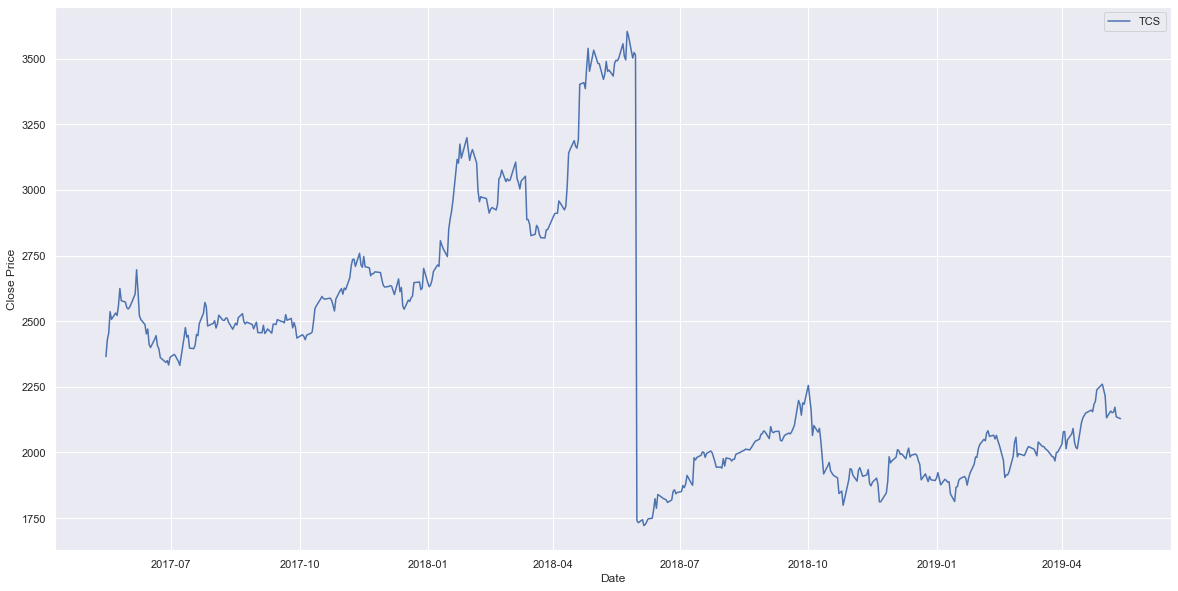

In [8]:
#data['Close Price'].plot(label='TCS', figsize=(16,8), title='Closing Prices with respect to Dates')

sns.lineplot(x="Date", y="Close Price", data=df_close_price_per_day,label='TCS' )
plt.legend()

In [9]:
data['Day_Perc_Change'].sort_values(ascending = True).head()

Date
2018-05-31   -50.46
2018-03-13    -5.42
2018-10-04    -4.53
2018-10-03    -4.11
2019-05-03    -3.76
Name: Day_Perc_Change, dtype: float64

- 2018-05-31 - [Tata Consultancy Services shares turn ex-bonus](https://economictimes.indiatimes.com/markets/stocks/news/tata-consultancy-services-shares-turn-ex-bonus/articleshow/64395320.cms?from=mdr)
- 2018-03-13 - [TCS shares fall over 5%; m-cap dips by Rs 30,513 cr](https://www.thehindubusinessline.com/markets/stock-markets/tcs-plunges-6-on-share-sale-buzz/article23208662.ece)
- 2018-10-12 - [TCS stock drops 3% as brokers turn cautious post Q2](https://economictimes.indiatimes.com/markets/stocks/news/tcs-stock-drops-3-as-brokers-turn-cautious-post-q2/articleshow/66174767.cms)

> News on dates 3rd and 4th October, 2018 not available

In [10]:
data['Day_Perc_Change'].sort_values().tail()

Date
2019-04-15    4.90
2018-11-28    4.95
2018-01-22    5.31
2018-07-11    5.59
2018-04-20    6.62
Name: Day_Perc_Change, dtype: float64

- 2018-04-20 - [TCS spikes 6.5% to record high of Rs 3,400](https://www.thehindubusinessline.com/markets/stock-markets/tcs-hits-record-high-of-rs-3327-on-q4-profit/article23612250.ece)
- 2018-07-11 - [TCS dribbles past estimates with fastest growth in 15 quarters](https://economictimes.indiatimes.com/markets/stocks/earnings/tcs-dribbles-past-estimates-with-fastest-growth-in-15-quarters/articleshow/64940718.cms?from=mdr)
- 2018-01-22 - [Tata Consultancy Services Ltd.(TCS, 532540) Stock & Share Price Update With Analysis](https://www.outlookindia.com/sharemarket/tata-consultancy-services-ltd-tcs-532540/2018-01-22)
- 2018-11-28 - [Technicals suggest more upside for TCS](https://www.thehindubusinessline.com/markets/stock-markets/technicals-suggest-more-upside-for-tcs/article25612030.ece)
- 2019-04-15 - [TCS Shares Gain Nearly 4% After Q4 Results](http://www.businessworld.in/article/TCS-Shares-Gain-Nearly-4-After-Q4-Results/15-04-2019-169292/)

## Query 2.2 - Discrete Series STEM Plot
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<StemContainer object of 3 artists>

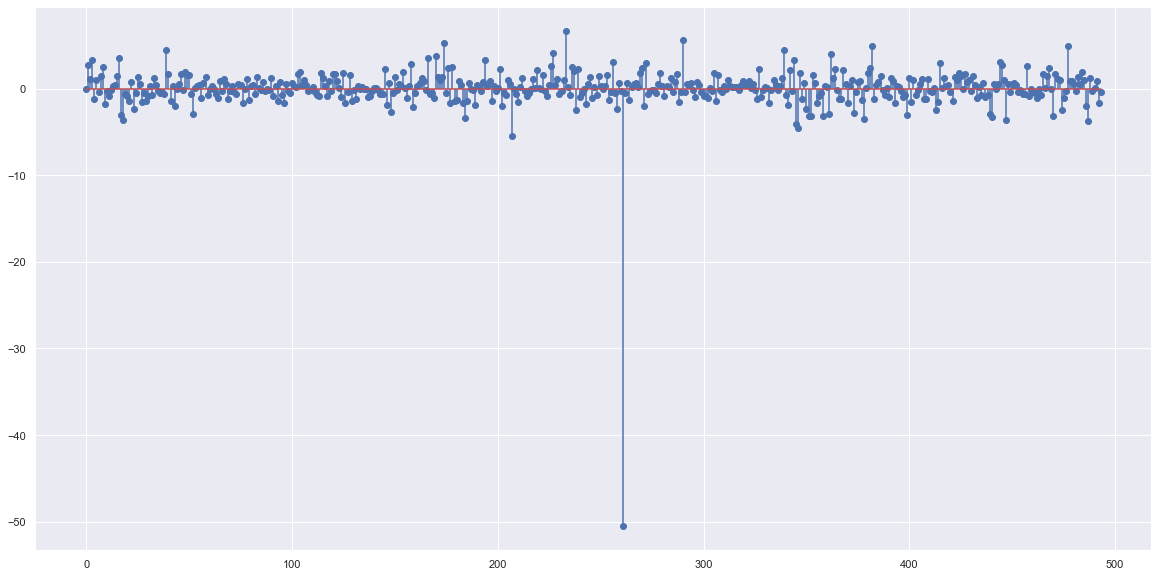

In [11]:
plt.figure(figsize=(20,10))
plt.stem(data['Day_Perc_Change'], use_line_collection=True)

## Query 2.3 - Volume Plot 

Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change

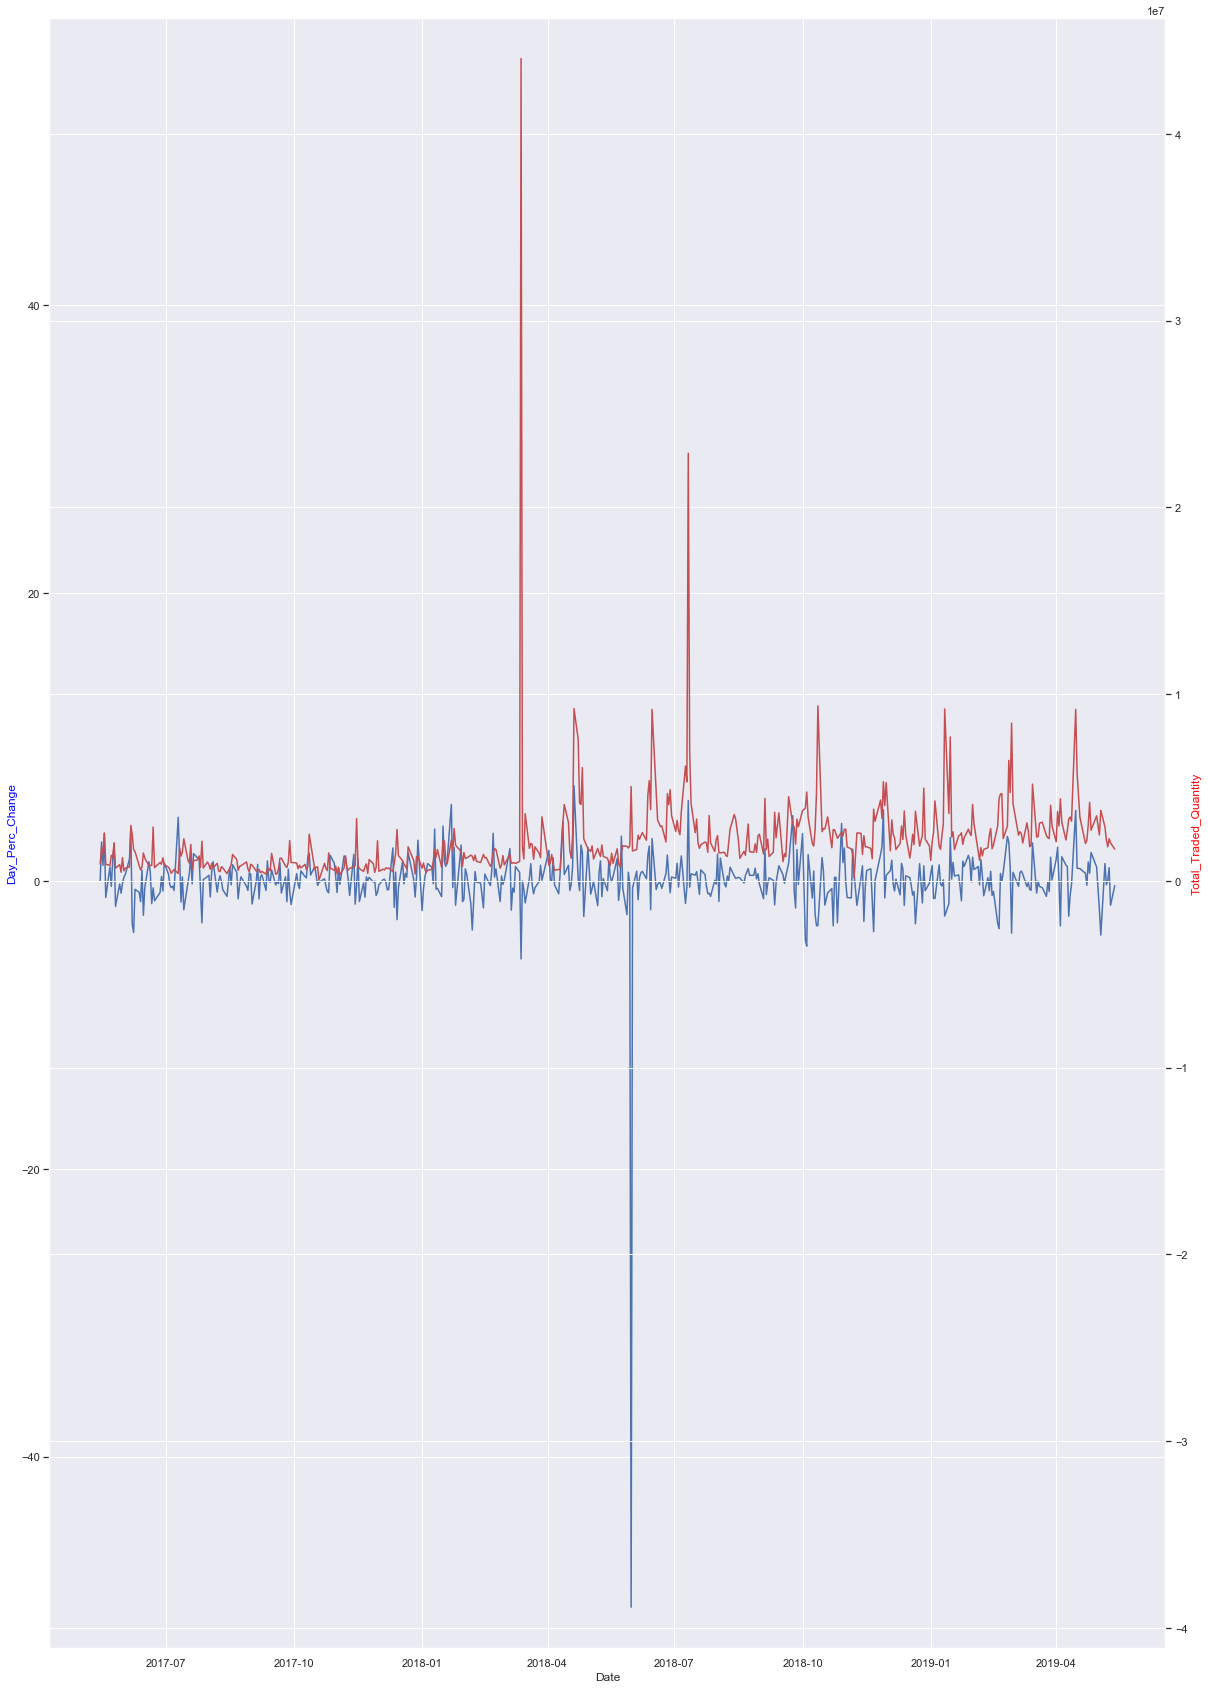

In [12]:
fig = plt.figure(figsize=(20,30))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.set_xlabel('Date')
ax2.set_ylabel('Total_Traded_Quantity', color='red')
ax2.plot(data['Total Traded Quantity'], 'r-')

ax1.plot(data['Day_Perc_Change'], 'b-')
ax1.set_ylabel('Day_Perc_Change', color='blue')

# SOURCE: https://stackoverflow.com/questions/10481990/matplotlib-axis-with-two-scales-shared-origin
'''
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)'''
    
    
def align_yaxis(ax1, ax2):
    y_lims = np.array([ax.get_ylim() for ax in [ax1, ax2]])

    # force 0 to appear on both axes, comment if don't need
    y_lims[:, 0] = y_lims[:, 0].clip(None, 0)
    y_lims[:, 1] = y_lims[:, 1].clip(0, None)

    # normalize both axes
    y_mags = (y_lims[:,1] - y_lims[:,0]).reshape(len(y_lims),1)
    y_lims_normalized = y_lims / y_mags

    # find combined range
    y_new_lims_normalized = np.array([np.min(y_lims_normalized), np.max(y_lims_normalized)])

    # denormalize combined range to get new axes
    new_lim1, new_lim2 = y_new_lims_normalized * y_mags
    ax1.set_ylim(new_lim1)
    ax2.set_ylim(new_lim2)
    
align_yaxis(ax1, ax2)

In [13]:
data['Day_Perc_Change'].describe()

count    494.000000
mean       0.029636
std        2.716417
min      -50.460000
25%       -0.660000
50%        0.075000
75%        0.887500
max        6.620000
Name: Day_Perc_Change, dtype: float64

__Documentation:-__

__Analysis__ : The positive hills of Day_Perc_Change matches slightly with the Total Traded Quantity

__Inference__: It implies that whenever the positive daily percentages increases our total traded quantity also rises by somewhat the same amount.

And since the daily changing percentage depends upon the closing prices of each day hence closing prices play a major in the increase of the total traded quantity

## Query 2.4 - Pie Chart

We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [14]:
trend_aggregation = data.groupby('Trend').count()['Symbol']
trend_aggregation

Trend
Among top gainers     18
Among top losers      13
Bear drop              1
Negative              75
Positive              93
Slight               182
Slight negative       53
Slight positive       59
Name: Symbol, dtype: int64

In [15]:
trend_aggregation.index

Index(['Among top gainers', 'Among top losers', 'Bear drop', 'Negative',
       'Positive', 'Slight', 'Slight negative', 'Slight positive'],
      dtype='object', name='Trend')

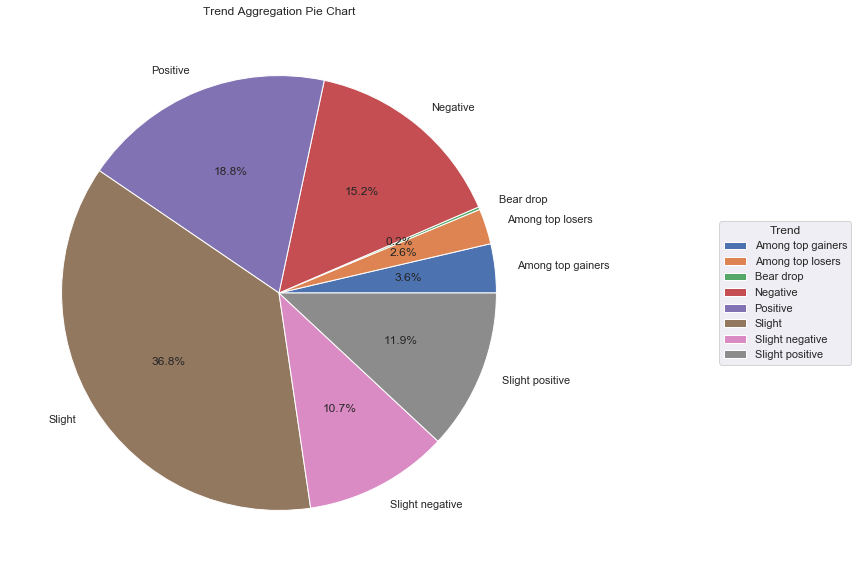

In [16]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

ax.pie( trend_aggregation, labels=trend_aggregation.index, autopct='%1.1f%%' )

ax.set_title("Trend Aggregation Pie Chart")
ax.legend(trend_aggregation.index,title="Trend",loc="center left",bbox_to_anchor=(1.3, 0, 0.5, 1))

plt.show()

In [17]:
volume_by_trend = data.groupby('Trend',as_index=False)['Total Traded Quantity']
volume_by_trend.head()

Date
2017-05-15      908802
2017-05-16     1800513
2017-05-17     1438099
2017-05-18     2569297
2017-05-19      893022
2017-05-22      831970
2017-05-23     1374298
2017-05-24     1267274
2017-05-25     2047047
2017-05-26      681275
2017-05-29      874645
2017-05-30      463817
2017-05-31     1251365
2017-06-01      540032
2017-06-05      750094
2017-06-06     2973360
2017-06-07     2463888
2017-06-08     1665357
2017-06-09     1574017
2017-06-12      813253
2017-06-13      587707
2017-06-14      744571
2017-06-15     1498599
2017-06-20      835479
2017-06-27      987165
2017-06-29     1235913
2017-07-10      398392
2017-07-18      954001
2017-08-03      941274
2018-01-10     1682925
2018-01-16     2133876
2018-02-06     1328653
2018-03-13    44033577
2018-05-31     5049371
2018-10-03     3902322
2018-10-04     4762419
Name: Total Traded Quantity, dtype: int64

In [18]:
volume_by_trend.describe()

count  0         18.0
       1         13.0
       2          1.0
       3         75.0
       4         93.0
              ...    
max    3    9209862.0
       4    9183574.0
       5    7592955.0
       6    4888125.0
       7    5771952.0
Length: 64, dtype: float64

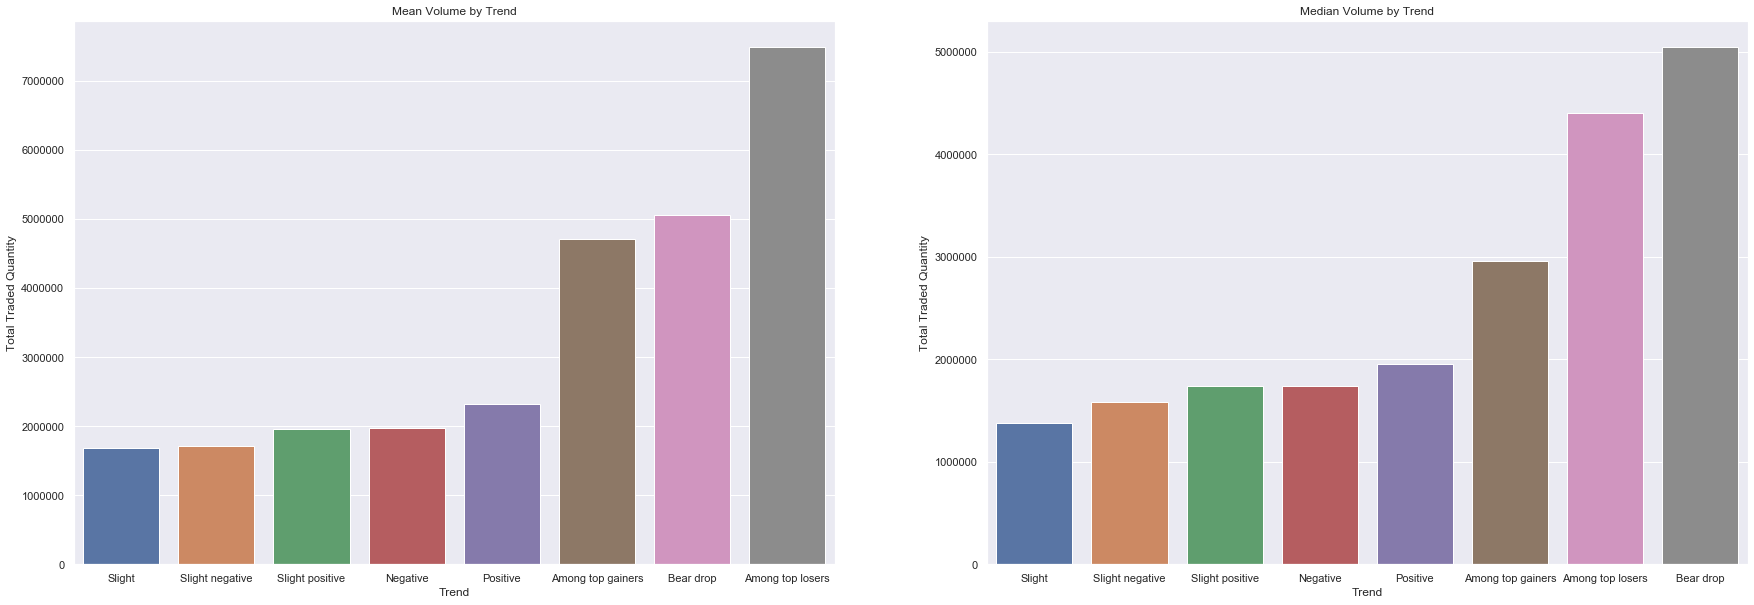

In [19]:
fig, axes = plt.subplots(figsize=(30, 10), nrows=1, ncols=2)

axes[0].set_title("Mean Volume by Trend")
sns.barplot(ax=axes[0], x='Trend', y='Total Traded Quantity', data=volume_by_trend.mean().sort_values('Total Traded Quantity'));

axes[1].set_title("Median Volume by Trend")
sns.barplot(ax=axes[1], x='Trend', y='Total Traded Quantity', data=volume_by_trend.median().sort_values('Total Traded Quantity'));

## Query 2.5 - Histogram

Plot the daily return (percentage) distribution as a histogram.

Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

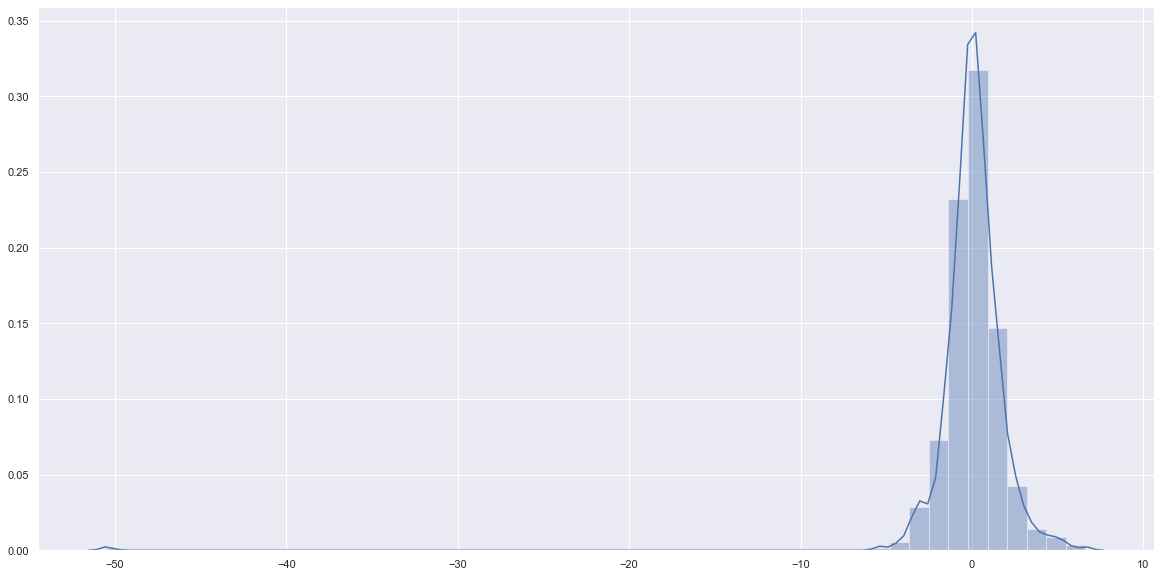

In [20]:
sns.distplot(data['Day_Perc_Change'].to_list(), kde=True, rug=False);

## Query 2.6 - Correlation Pair Plot
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.

Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on [correlation](https://www.investopedia.com/terms/c/correlation.asp) and [diversification](https://www.investopedia.com/terms/d/diversification.asp). 

In [21]:
filenames = glob2.glob("data/Large_Cap/*.csv")[:5]
filenames = { re.sub(r'.*/([A-Z]+)([a-z]+)_([A-Z])([a-z]+)(\\)','', filename): filename for filename in filenames }
filenames

{'ADANIPORTS.csv': 'data/Large_Cap\\ADANIPORTS.csv',
 'ASIANPAINT.csv': 'data/Large_Cap\\ASIANPAINT.csv',
 'AXISBANK.csv': 'data/Large_Cap\\AXISBANK.csv',
 'BAJFINANCE.csv': 'data/Large_Cap\\BAJFINANCE.csv',
 'BPCL.csv': 'data/Large_Cap\\BPCL.csv'}

In [22]:
def read_csv( filename ):
    dataframe = pd.read_csv(filename, parse_dates=['Date'])
    dataframe = dataframe[ dataframe['Series'] == 'EQ' ]
    dataframe.set_index('Date', inplace=True, drop=False)
    return dataframe
    
dataframes = { title[:-4]: read_csv( filename ) for (title,filename) in filenames.items() }

In [23]:
correlation_df = pd.DataFrame(columns=dataframes.keys())
print(correlation_df)
for (title,dataframe) in dataframes.items():
    correlation_df[title] = dataframe['Close Price']
    
correlation_df.head()

Empty DataFrame
Columns: [ADANIPORTS, ASIANPAINT, AXISBANK, BAJFINANCE, BPCL]
Index: []


,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL
Date,,,,,
2017-05-15,356.20,1148.05,500.1,1332.95,727.85
2017-05-16,354.50,1142.85,501.5,1347.75,733.30
2017-05-17,348.55,1154.95,502.8,1324.80,727.45
2017-05-18,347.90,1151.35,492.0,1314.55,714.90
2017-05-19,349.45,1123.15,501.7,1289.15,702.45


In [24]:
correlation_df_pct = correlation_df.pct_change().dropna()
correlation_df_pct.head()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL
Date,,,,,
2017-05-16,-0.004773,-0.004529,0.002799,0.011103,0.007488
2017-05-17,-0.016784,0.010588,0.002592,-0.017028,-0.007978
2017-05-18,-0.001865,-0.003117,-0.021480,-0.007737,-0.017252
2017-05-19,0.004455,-0.024493,0.019715,-0.019322,-0.017415
2017-05-22,0.014308,-0.009438,0.001196,-0.036458,-0.009752


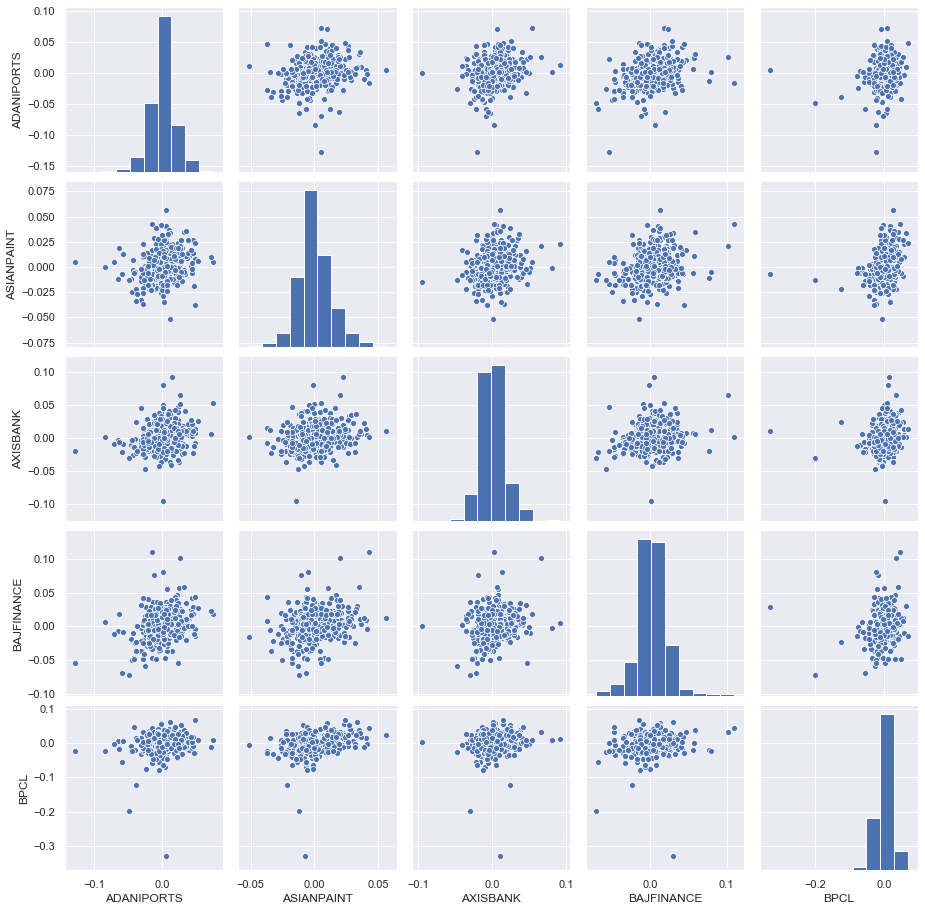

In [25]:
sns.pairplot(correlation_df_pct)

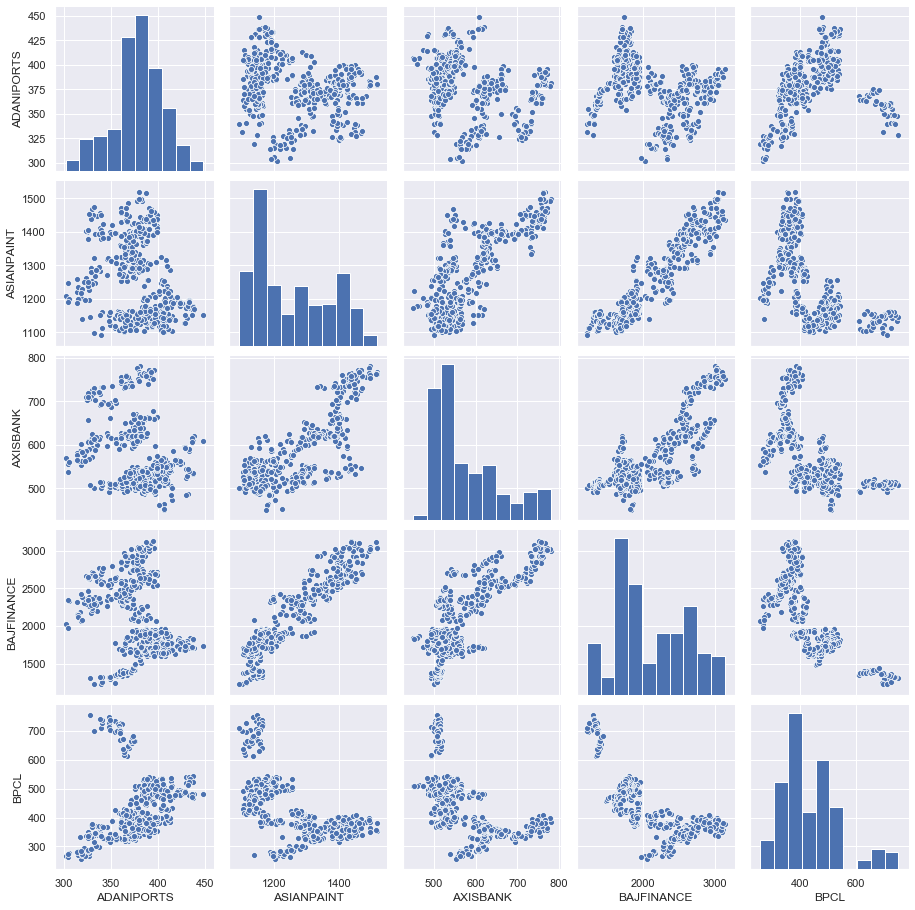

In [26]:
sns.pairplot(correlation_df)

## Query 2.7 - Calculating Volatility

Volatility is the change in variance in the returns of a stock over a specific period of time. Do give the following documentation on [volatility](https://www.investopedia.com/terms/v/volatility.asp) a read.

You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.

Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [27]:
data['Volatility'] = data['Close Price'].pct_change().rolling(7).std() * np.sqrt(7) 
# Volatility = rolling(N).std() * sqrt(N)

In [28]:
correlation_volatility = correlation_df_pct.rolling(7).std() * np.sqrt(7)  # Volatility = rolling(N).std() * sqrt(N)
correlation_volatility.tail()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL
Date,,,,,
2019-05-07,0.033656,0.030503,0.043093,0.030241,0.059997
2019-05-08,0.033689,0.030491,0.040909,0.041423,0.058001
2019-05-09,0.030381,0.033241,0.026683,0.047036,0.059885
2019-05-10,0.044862,0.024465,0.024534,0.047592,0.053258
2019-05-13,0.043365,0.024031,0.019364,0.044145,0.055215


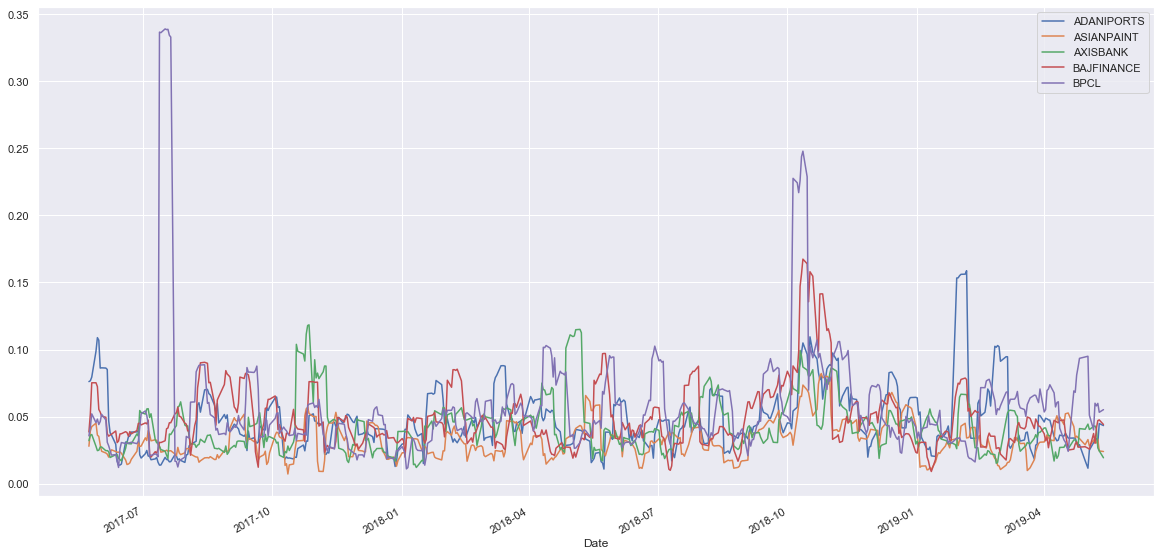

In [29]:
correlation_volatility.plot()

## Query 2.8 - Volatility and Beta

Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)


In [30]:
nifty = pd.read_csv( "data/Nifty50/Nifty50.csv", parse_dates=['Date'] )  # parse_dates=['Date'] cast to Timestamp
nifty.set_index('Date', inplace=True, drop=False)
nifty['Volatility'] = nifty.Close.pct_change().rolling(7).std() * np.sqrt(7)
nifty.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Volatility
Date,,,,,,,,
2019-05-07,2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,0.017630
2019-05-08,2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,0.019601
2019-05-09,2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,0.012183
2019-05-10,2019-05-10,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,0.011545
2019-05-13,2019-05-13,11258.70,11300.20,11125.60,11148.20,357586433,16722.91,0.011838


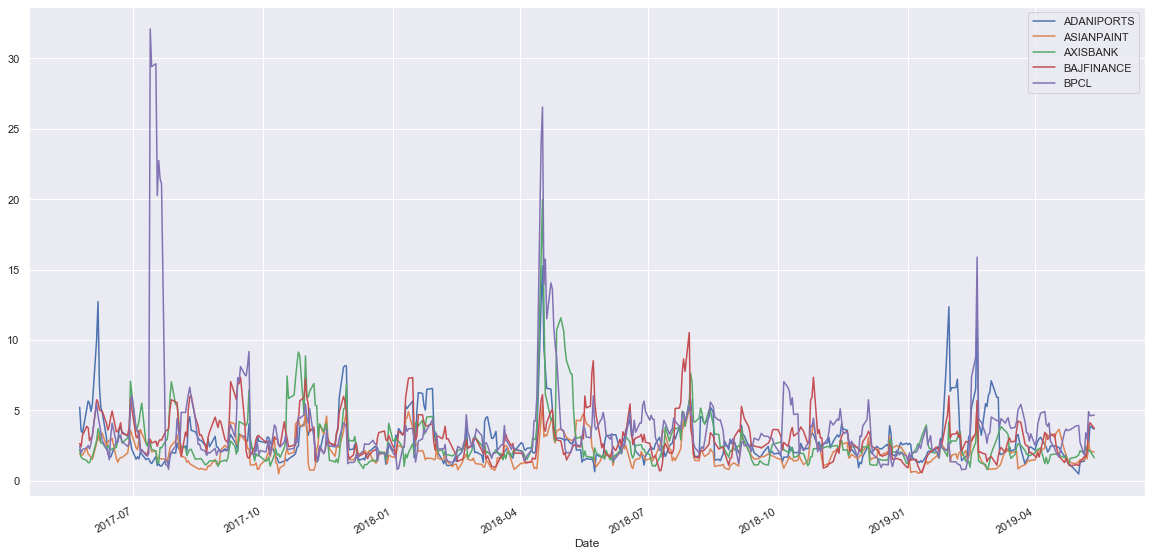

In [31]:
correlation_beta = pd.DataFrame()
for name in correlation_volatility.columns:
    correlation_beta[name] = correlation_volatility[name] / nifty['Volatility']
    
correlation_beta.plot()

## 2.9 - Trade Calls: Simple Moving Averages

Study about [simple moving averages](https://www.investopedia.com/terms/s/sma.asp) here. 

Plot the 21 day and 34 day Moving average with the average price and decide a Call! 

Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 

One of the most widely used technical indicators.

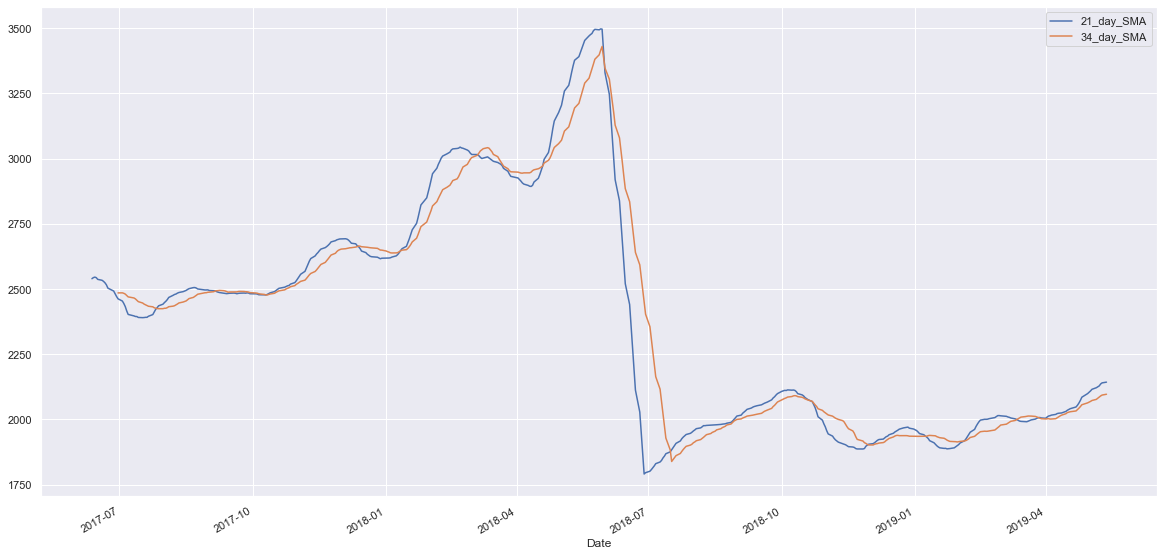

In [32]:
data["21_day_SMA"] = data['Close Price'].rolling(21).mean()
data["34_day_SMA"] = data['Close Price'].rolling(34).mean()
data[["21_day_SMA", "34_day_SMA"]].plot()

In [33]:
prev_index       = data.index[0]
prev_row         = data[:prev_index]
short_sma_higher = prev_row["21_day_SMA"][0] > prev_row["34_day_SMA"][0]
data['Trade_Call'] = 'HODL'

for index, row in data.iterrows():
    if row["21_day_SMA"] and row["34_day_SMA"]:    
        if short_sma_higher       and row["21_day_SMA"] < row["34_day_SMA"]:
            result = "SELL"
        elif not short_sma_higher and row["21_day_SMA"] > row["34_day_SMA"]:
            result = "BUY"
        else:
            result = "HODL" 
        data.at[index, 'Trade_Call'] = result
        short_sma_higher = row["21_day_SMA"] > row["34_day_SMA"]                        
    
signals = data[["Close Price", "21_day_SMA", "34_day_SMA", "Trade_Call"]][ data['Trade_Call'] != "HODL" ]
signals

,Close Price,21_day_SMA,34_day_SMA,Trade_Call
Date,,,,
2017-07-27,2481.70,2428.323810,2425.120588,BUY
2017-09-06,2453.20,2489.945238,2493.472059,SELL
2017-10-11,2500.35,2479.214286,2477.175000,BUY
2017-12-13,2628.40,2662.069048,2664.892647,SELL
2018-01-11,2790.50,2647.559524,2646.360294,BUY
2018-03-06,3042.80,3010.721429,3020.742647,SELL
2018-04-20,3402.45,2996.919048,2982.477941,BUY
2018-06-01,1732.45,3328.928571,3346.585294,SELL
2018-07-17,2002.15,1883.923810,1838.869118,BUY


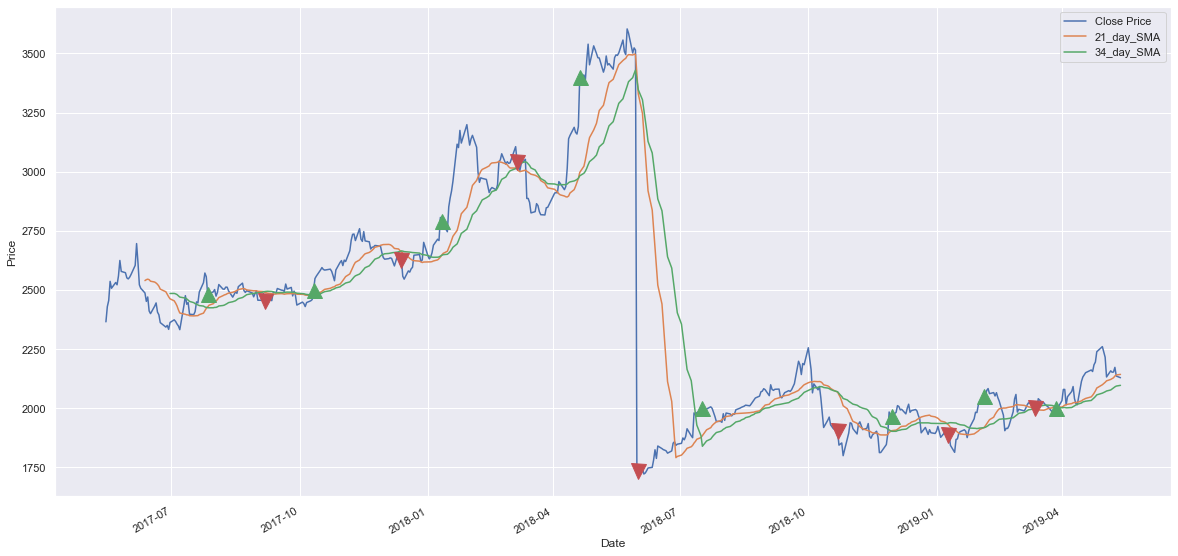

In [34]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, ylabel="Price")

data[["Close Price", "21_day_SMA", "34_day_SMA"]].plot(ax=ax1)

ax1.plot( data["Close Price"][ data['Trade_Call'] == 'BUY' ].index, 
          data["Close Price"][ data['Trade_Call'] == 'BUY' ], 
          '^', markersize=15, color='g' )

ax1.plot( data["Close Price"][ data['Trade_Call'] == 'SELL' ].index, 
          data["Close Price"][ data['Trade_Call'] == 'SELL' ], 
          'v', markersize=15, color='r' )

In [35]:
bank = {
    "start_dollars": 100000,
    "dollars":       100000,
    "stock":         0
}

for index, row in signals.iterrows():
    if row['Trade_Call'] == "BUY":
        buy_amount        = row['Close Price'] / bank['dollars']
        bank['stock']    += buy_amount 
        bank['dollars']  -= buy_amount * row['Close Price'] 
    
    if row['Trade_Call'] == "SELL" or index == signals[-1:].index[0]:
        sell_amount       = bank['stock']
        bank['stock']    -= sell_amount 
        bank['dollars']  += sell_amount * row['Close Price'] 
        
bank['profit'] = bank['dollars'] / bank['dollars']
bank

{'start_dollars': 100000,
 'dollars': 99948.11162914145,
 'stock': 0.0,
 'profit': 1.0}

## Query 2.10 - Trade Calls: Bollinger Bands 

Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 

The bollinger bands comprise the following data points: 
- The 14 day rolling mean of the closing price (we call it the average) 
- Upper band which is the rolling mean + 2 standard deviations away from the average. 
- Lower band which is the rolling mean - 2 standard deviations away from the average. 
- Average Daily stock price.

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 

Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 

Save to a new csv file. 

In [36]:
data["14_day_SMA"] = data['Close Price'].rolling(14).mean()
data["14_day_STD"] = data['Close Price'].rolling(14).std()
data["14_day_bollinger_upper"] = data["14_day_SMA"] + data["14_day_STD"] * 2
data["14_day_bollinger_lower"] = data["14_day_SMA"] - data["14_day_STD"] * 2

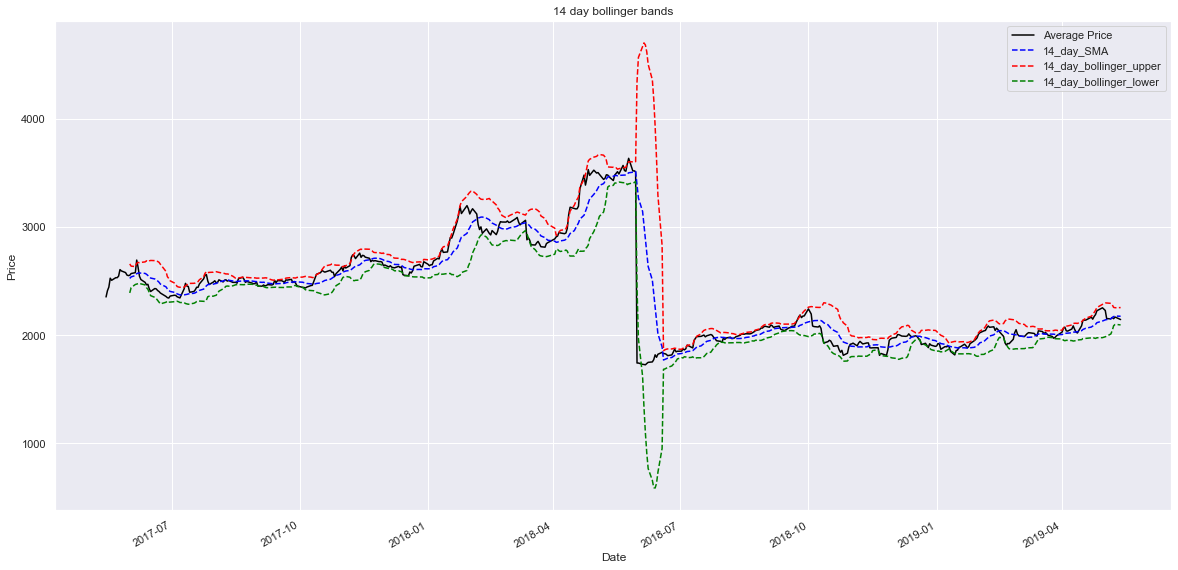

In [37]:
ax = plt.gca()

data.plot(kind='line',x='Date', y='Average Price', ax=ax, color='black')
data.plot(kind='line',x='Date', y='14_day_SMA',    ax=ax, color='blue', linestyle='--')
data.plot(kind='line',x='Date', y='14_day_bollinger_upper',    ax=ax, color='red', linestyle='--')
data.plot(kind='line',x='Date', y='14_day_bollinger_lower',    ax=ax, color='green', linestyle='--')


plt.title("14 day bollinger bands")
plt.ylabel("Price")
plt.show()

In [38]:
week3_filename = 'week3.csv'
#os.makedirs(os.path.dirname(week3_filename), exist_ok=True)
data.to_csv(week3_filename)
data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Day_Perc_Change,Trend,Volatility,21_day_SMA,34_day_SMA,Trade_Call,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2017-05-15,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,...,0.00,Slight,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN
2017-05-16,TCS,EQ,2017-05-16,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,...,2.71,Positive,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN
2017-05-17,TCS,EQ,2017-05-17,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,...,1.08,Positive,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN
2017-05-18,TCS,EQ,2017-05-18,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,...,3.29,Among top gainers,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN
2017-05-19,TCS,EQ,2017-05-19,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,...,-1.15,Negative,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,TCS,EQ,2019-05-07,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,...,-0.27,Slight,0.053555,2124.990476,2081.357353,HODL,2161.478571,59.600654,2280.679880,2042.277263
2019-05-08,TCS,EQ,2019-05-08,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,...,0.04,Slight,0.053012,2128.492857,2086.223529,HODL,2171.360714,42.320799,2256.002313,2086.719115
2019-05-09,TCS,EQ,2019-05-09,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,...,0.92,Slight positive,0.048631,2136.019048,2090.123529,HODL,2175.592857,38.891629,2253.376115,2097.809600
